In [24]:
# Dopo aver svolto le operazioni di pulizia dei dataset (una tantum), leggo ed uso i files puliti

import numpy as np
import pandas as pd


comuni_clean = pd.read_csv("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/comuni_clean.csv", na_filter=False)
comuni_clean=comuni_clean.drop('Unnamed: 0', axis=1)

province_clean = pd.read_csv("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/Materiali_puliti/province_clean.csv")
province_clean=province_clean.drop('Unnamed: 0', axis=1)

regioni_clean = pd.read_csv("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/Materiali_puliti/regioni_clean.csv")
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)

ripartizioni_clean = pd.read_csv("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/Materiali_puliti/ripartizioni_clean.csv")
ripartizioni_clean=ripartizioni_clean.drop('Unnamed: 0', axis=1)

#stampo i dataset importati per verificare che siano formattati correttamente
print("comuni",comuni_clean['Regione'].unique(), comuni_clean.iloc[161:170,:],"\n","\n","\n", "province", province_clean.head(2), "\n","\n","\n", "regioni", regioni_clean.head(2), "\n","\n","\n", "ripartizioni", ripartizioni_clean.head(2))


comuni ['Piemonte' '' "Valle d'Aosta" 'Lombardia' 'Trentino-Alto Adige/Sudtirol'
 'Veneto' 'Friuli-Venezia Giulia' 'Liguria' 'Emilia-Romagna' 'Toscana'
 'Umbria' 'Marche' 'Lazio' 'Abruzzo' 'Molise' 'Campania' 'Puglia'
 'Basilicata' 'Calabria' 'Sicilia' 'Sardegna']      Denominazione Unnamed: 1   Regione Sigla automobilistica Popolazione2011
161      Nichelino             Piemonte                    TO           47851
162         Noasca             Piemonte                    TO             169
163           Nole             Piemonte                    TO            6910
164       Nomaglio             Piemonte                    TO             312
165           None             Piemonte                    TO            7998
166       Novalesa             Piemonte                    TO             560
167      Oglianico             Piemonte                    TO            1426
168      Orbassano             Piemonte                    TO           22537
169  Orio Canavese             Pi

regioni_somma_contagi                       RegionName  TotalPositiveCases
0                        Abruzzo               30274
1                     Basilicata                8940
2                       Calabria               18537
3                       Campania              165293
4                 Emilia-Romagna              133761
5          Friuli-Venezia Giulia               35467
6                          Lazio              130255
7                        Liguria               53779
8                      Lombardia              429109
9                         Marche               32393
10                        Molise                5286
11                      Piemonte              177788
12                        Puglia               64341
13                      Sardegna               24186
14                       Sicilia               71489
15                       Toscana              108397
16  Trentino-Alto Adige/Sudtirol               25361
17                      

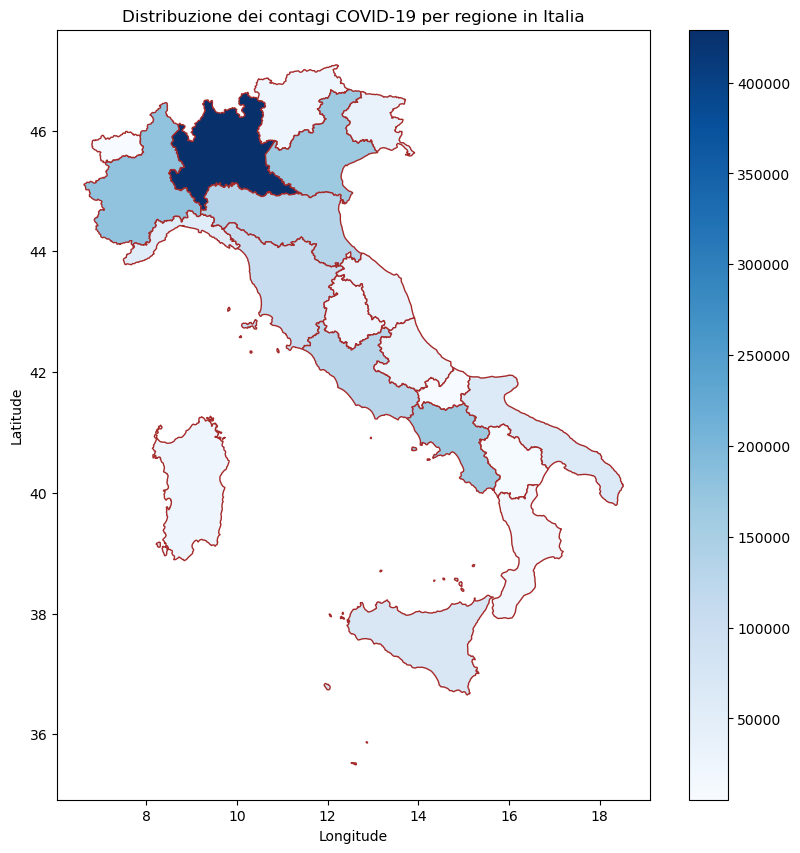

In [25]:
# Visualizzazione dei Contagi massimi per regione sulla mappa d'Italia

import matplotlib.pyplot as plt
import geopandas as gpd
italy = gpd.read_file("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/italy-with-regions_357.geojson")

regioni_somma_contagi = regioni_clean.groupby('RegionName')['TotalPositiveCases'].max().reset_index()
print("regioni_somma_contagi", regioni_somma_contagi)

italy_with_cases = italy.merge(regioni_somma_contagi, left_on='name', right_on='RegionName', how='left')

italy_with_cases.plot(column='TotalPositiveCases', cmap='Blues', edgecolor='brown', legend=True, figsize=(10, 10))

plt.title('Distribuzione dei contagi COVID-19 per regione in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


regioni_decessi                       RegionName  Deaths
0                        Abruzzo     980
1                     Basilicata     175
2                       Calabria     343
3                       Campania    1990
4                 Emilia-Romagna    6162
5          Friuli-Venezia Giulia    1035
6                          Lazio    2622
7                        Liguria    2521
8                      Lombardia   23024
9                         Marche    1327
10                        Molise     135
11                      Piemonte    6623
12                        Puglia    1712
13                      Sardegna     531
14                       Sicilia    1759
15                       Toscana    2867
16  Trentino-Alto Adige/Sudtirol     691
17                        Umbria     460
18                 Valle d'Aosta     333
19                        Veneto    4210


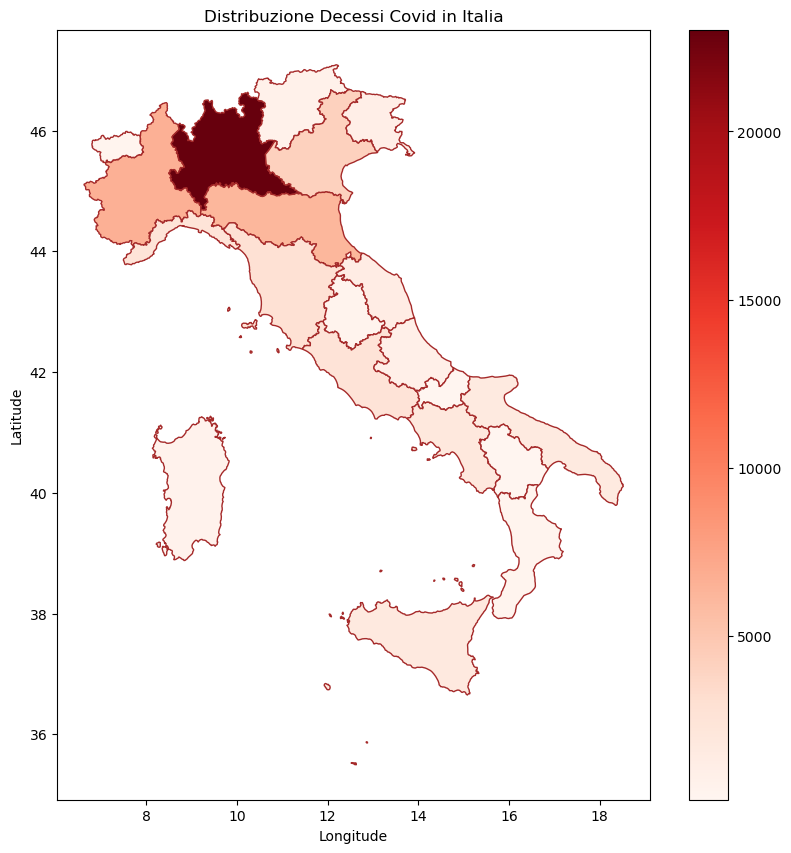

In [26]:
# Visualizzazione dei Decessi massimi per regione sulla mappa d'Italia

import matplotlib.pyplot as plt
import geopandas as gpd

italy = gpd.read_file("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/italy-with-regions_357.geojson")
#da sito web https://cartographyvectors.com/map/357-italy-with-regions

regioni_decessi = regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()
print("regioni_decessi", regioni_decessi)

italy_with_cases = italy.merge(regioni_decessi, left_on='name', right_on='RegionName', how='left')

italy_with_cases.plot(column='Deaths', cmap='Reds', edgecolor='brown', legend=True, figsize=(10, 10))

plt.title('Distribuzione Decessi Covid in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


regioni_guariti                       RegionName  Recovered
0                        Abruzzo      12206
1                     Basilicata       2397
2                       Calabria       7533
3                       Campania      62060
4                 Emilia-Romagna      59432
5          Friuli-Venezia Giulia      19401
6                          Lazio      33422
7                        Liguria      40842
8                      Lombardia     289706
9                         Marche      11008
10                        Molise       2438
11                      Piemonte     105127
12                        Puglia      16795
13                      Sardegna       8695
14                       Sicilia      29984
15                       Toscana      76331
16  Trentino-Alto Adige/Sudtirol      13995
17                        Umbria      18619
18                 Valle d'Aosta       5406
19                        Veneto      84235


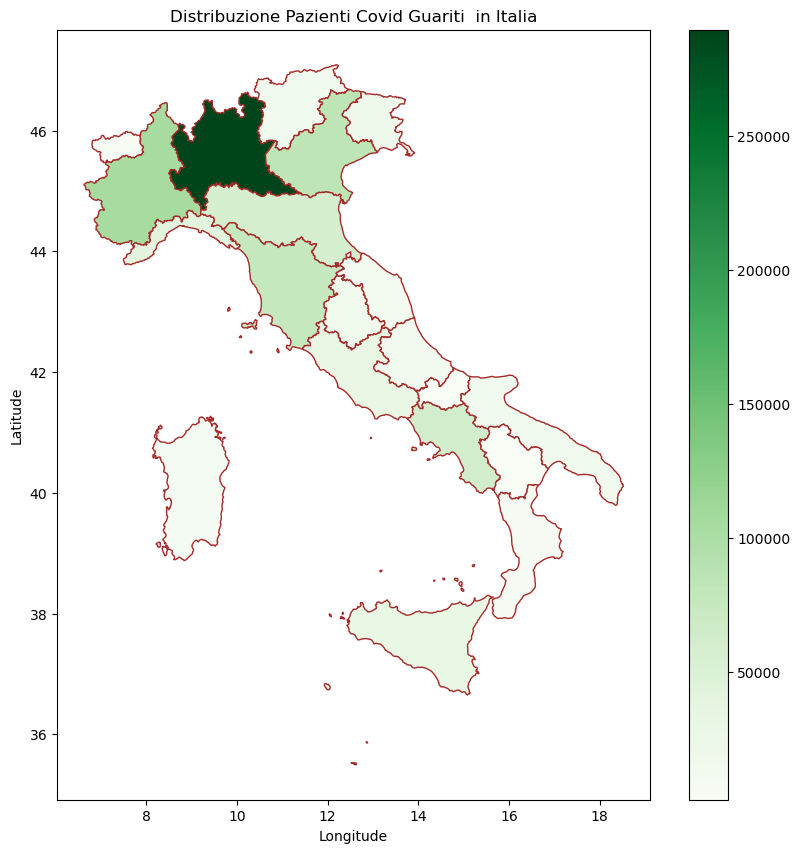

In [27]:
# Visualizzazione dei Pazienti Guariti massimi per regione sulla mappa d'Italia

import matplotlib.pyplot as plt
import geopandas as gpd

italy = gpd.read_file("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/italy-with-regions_357.geojson")
#da sito web https://cartographyvectors.com/map/357-italy-with-regions

regioni_guariti = regioni_clean.groupby('RegionName')['Recovered'].max().reset_index()
print("regioni_guariti", regioni_guariti)

italy_with_cases = italy.merge(regioni_guariti, left_on='name', right_on='RegionName', how='left')

italy_with_cases.plot(column='Recovered', cmap='Greens', edgecolor='brown', legend=True, figsize=(10, 10))

plt.title('Distribuzione Pazienti Covid Guariti  in Italia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Le tre regioni con il maggior tasso di pazienti guariti sono:
RegionName
Lombardia         13328
Piemonte           5618
Emilia-Romagna     4310
Name: TotalHospitalizedPatients, dtype: int64


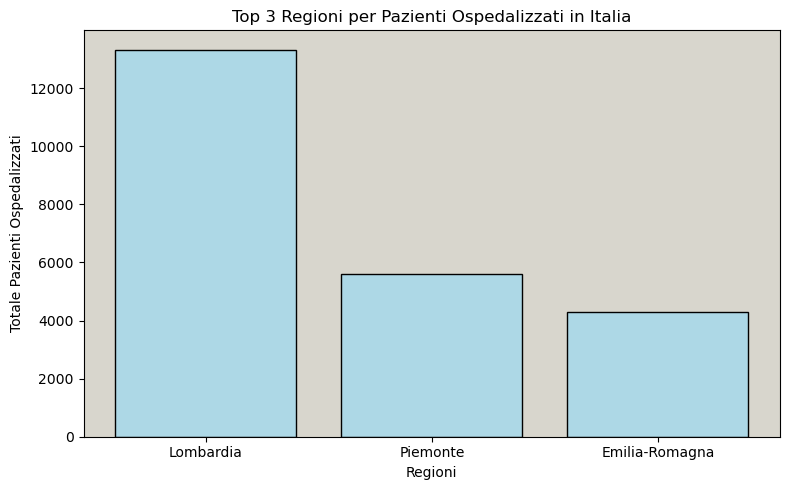

In [28]:
# prime 3 regioni per pazienti ospedalizzati

HospitalizedPatients_by_region = regioni_clean.groupby('RegionName')['TotalHospitalizedPatients'].max()
sorted_regions_HospitalizedPatients = HospitalizedPatients_by_region.sort_values(ascending=False)
top_3_regions_HospitalizedPatients = sorted_regions_HospitalizedPatients.head(3)
print("Le tre regioni con il maggior tasso di pazienti guariti sono:")
print(top_3_regions_HospitalizedPatients)
region_names = top_3_regions_HospitalizedPatients.index
total_hospitalized_counts = top_3_regions_HospitalizedPatients.values

plt.figure(figsize=(8, 5))
plt.gca().set_facecolor('#D8D6CD')
plt.bar(region_names, total_hospitalized_counts, color='lightblue', edgecolor='black')
plt.xlabel('Regioni')
plt.ylabel('Totale Pazienti Ospedalizzati')
plt.title('Top 3 Regioni per Pazienti Ospedalizzati in Italia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Le tre regioni con il maggior tasso di pazienti guariti sono:
RegionName
Lombardia    289706
Piemonte     105127
Veneto        84235
Name: Recovered, dtype: int64


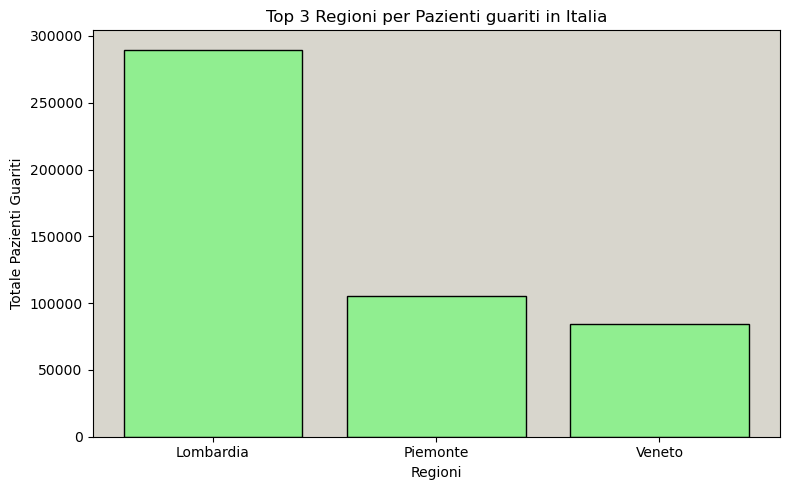

In [29]:
# prime 3 regioni per numero di pazienti guariti

total_Recovered_by_region = regioni_clean.groupby('RegionName')['Recovered'].max()
sorted_regions = total_Recovered_by_region.sort_values(ascending=False)
top_3_regions = sorted_regions.head(3)
print("Le tre regioni con il maggior tasso di pazienti guariti sono:")
print(top_3_regions)
region_names = top_3_regions.index
total_hospitalized_counts = top_3_regions.values

plt.figure(figsize=(8, 5))
plt.gca().set_facecolor('#D8D6CD')
plt.bar(region_names, total_hospitalized_counts, color='lightgreen',edgecolor='black')
plt.xlabel('Regioni')
plt.ylabel('Totale Pazienti Guariti')
plt.title('Top 3 Regioni per Pazienti guariti in Italia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


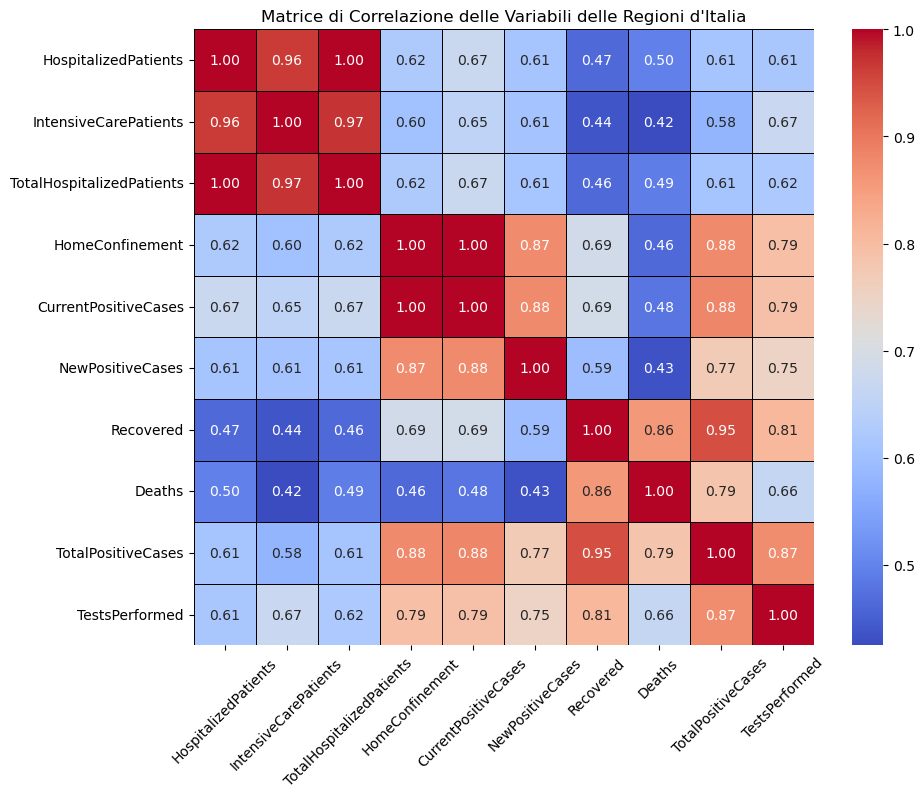

In [30]:
# matrice di correlazione delle varie colonne del dataset regioni_clean
import seaborn as sns

# Seleziono solo le colonne numeriche
colonne_numeriche = regioni_clean.select_dtypes(include='number')

# Calcolo la matrice di correlazione
corr_matrix = colonne_numeriche.corr()
corr_matrix = corr_matrix.iloc[4:, 4:]

#raffiguro il grafico heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, linecolor='black')
plt.title('Matrice di Correlazione delle Variabili delle Regioni d\'Italia')
plt.xticks(rotation=45)
plt.show()



Totale_contagiati_2020 1729061


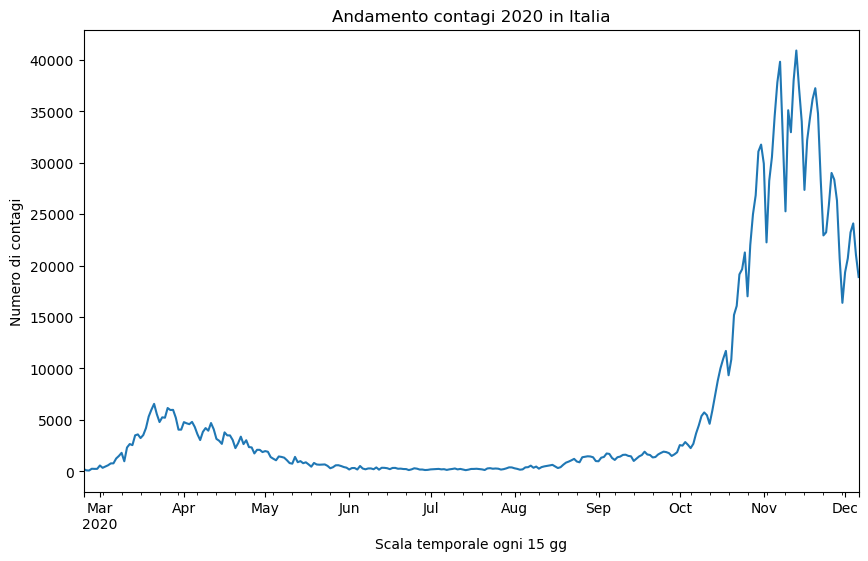

In [31]:
# evoluzione del contagio nell'arco del 2020, tra febbraio e dicembre

# mi assicuro che la colonna "Date" sia visualizzata come una data e la imposto come indice
regioni_clean = pd.read_csv("/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/Materiali_puliti/regioni_clean.csv")
regioni_clean=regioni_clean.drop('Unnamed: 0', axis=1)
regioni_clean['Date'] = pd.to_datetime(regioni_clean['Date'])
regioni_clean.set_index('Date', inplace=True)

# visualizzo il grafico a linea 
c = regioni_clean.resample('D')['NewPositiveCases'].sum().plot(kind="line", figsize=(10, 6))
print("Totale_contagiati_2020",regioni_clean['NewPositiveCases'].sum())

plt.title('Andamento contagi 2020 in Italia')
plt.xlabel('Scala temporale ogni 15 gg')
plt.ylabel('Numero di contagi')
plt.show()


          Date  NewPositiveCases  Deaths  nuovi_morti
0   2020-02-24               221       7            7
1   2020-02-25                93      10            3
2   2020-02-26                78      12            2
3   2020-02-27               250      17            5
4   2020-02-28               238      21            4
..         ...               ...     ...          ...
282 2020-12-02             20709   57045          684
283 2020-12-03             23225   58038          993
284 2020-12-04             24099   58852          814
285 2020-12-05             21052   59514          662
286 2020-12-06             18887   60078          564

[287 rows x 4 columns]


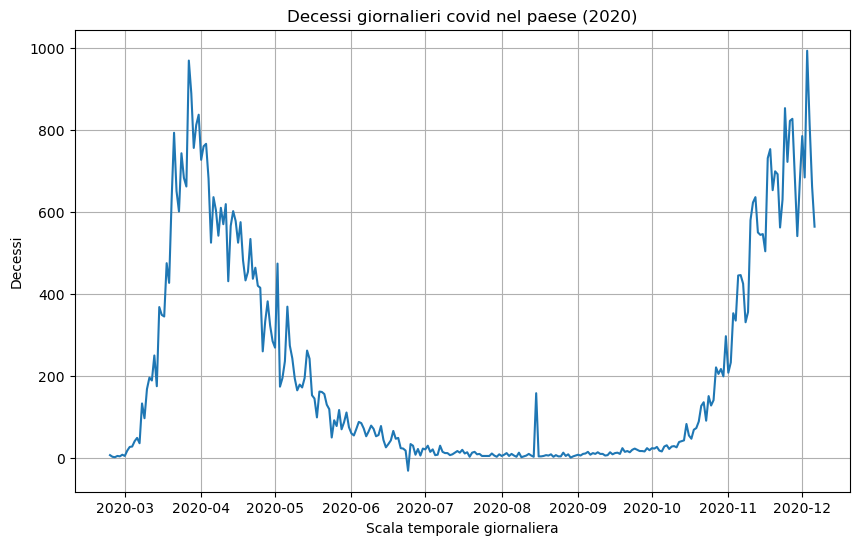

In [32]:
# Calcolo e visualizzazione della Mortalità Giornaliera per Covid-19 tra febbraio e dicembre 2020

contagimorti_giornalieri=regioni_clean.resample('D')[['NewPositiveCases','Deaths']].sum().reset_index()
contagimorti_giornalieri['nuovi_morti']=0
for i in range(0, 287):
        if i==0:
                contagimorti_giornalieri.iloc[0,3]=contagimorti_giornalieri.iloc[0,2]
        else:
                contagimorti_giornalieri.iloc[i,3]=contagimorti_giornalieri.iloc[i,2]-contagimorti_giornalieri.iloc[(i-1),2]
    
print(contagimorti_giornalieri)
#print(contagimorti_giornalieri[['Date','TotalPositiveCases','Deaths']])
#contagimorti_giornalieri['letalita']=(contagimorti_giornalieri['Deaths']/contagimorti_giornalieri['TotalPositiveCases'])*100
#letalita=contagimorti_giornalieri['letalita'].round(decimals=3)
plt.figure(figsize=(10, 6))
plt.plot(contagimorti_giornalieri.iloc[:,0],contagimorti_giornalieri.iloc[:,3])
plt.grid(True)
plt.title('Decessi giornalieri covid nel paese (2020)')
plt.xlabel('Scala temporale giornaliera')
plt.ylabel('Decessi')
plt.show()


In [33]:
# Per esercizio personale, abbiamo scritto una funzione che prende in input una Regione e ritorna in output tutti i comuni ripetuti una sola volta; 
# questa funzione è stata sviluppata dal seguente codice:
# Regione = input("Inserisci una Regione: ")
# comuni_regione = comuni_clean[comuni_clean['Regione'].str.contains(Regione, case=False, na=False)]['Denominazione'].drop_duplicates().tolist()
# print(f"I comuni della regione '{Regione}' sono: {comuni_regione}")

def comuni_per_regione(regione):
    comuni_regione = comuni_clean[comuni_clean['Regione'].str.contains(regione, case=False, na=False)]['Denominazione'].drop_duplicates().tolist()
    return comuni_regione

comuni_di_interesse = comuni_per_regione("Molise")
print(comuni_di_interesse)



['Acquaviva Collecroce', 'Baranello', 'Bojano', 'Bonefro', 'Busso', 'Campobasso', 'Campochiaro', 'Campodipietra', 'Campolieto', 'Campomarino', 'Casacalenda', 'Casalciprano', 'Castelbottaccio', 'Castellino del Biferno', 'Castelmauro', 'Castropignano', 'Cercemaggiore', 'Cercepiccola', 'Civitacampomarano', " Colle d'Anchise ", 'Colletorto', 'Duronia', 'Ferrazzano', 'Fossalto', 'Gambatesa', 'Gildone', 'Guardialfiera', 'Guardiaregia', 'Guglionesi', 'Jelsi', 'Larino', 'Limosano', 'Lucito', 'Lupara', 'Macchia Valfortore', 'Mafalda', 'Matrice', 'Mirabello Sannitico', 'Molise', 'Monacilioni', 'Montagano', 'Montecilfone', 'Montefalcone nel Sannio', 'Montelongo', 'Montemitro', 'Montenero di Bisaccia', 'Montorio nei Frentani', 'Morrone del Sannio', 'Oratino', 'Palata', 'Petacciato', 'Petrella Tifernina', 'Pietracatella', 'Pietracupa', 'Portocannone', 'Provvidenti', 'Riccia', 'Ripabottoni', 'Ripalimosani', 'Roccavivara', 'Rotello', 'Salcito', 'San Biase', 'San Felice del Molise', 'San Giacomo degli

Le dieci province con il maggior tasso di pazienti positivi sono:
ProvinceName
Milano                   158717
Napoli                   102702
Roma                      96985
Torino                    94349
Varese                    45944
Monza e della Brianza     44603
Brescia                   36010
Treviso                   31952
Genova                    31864
Padova                    31073
Name: TotalPositiveCases, dtype: int64


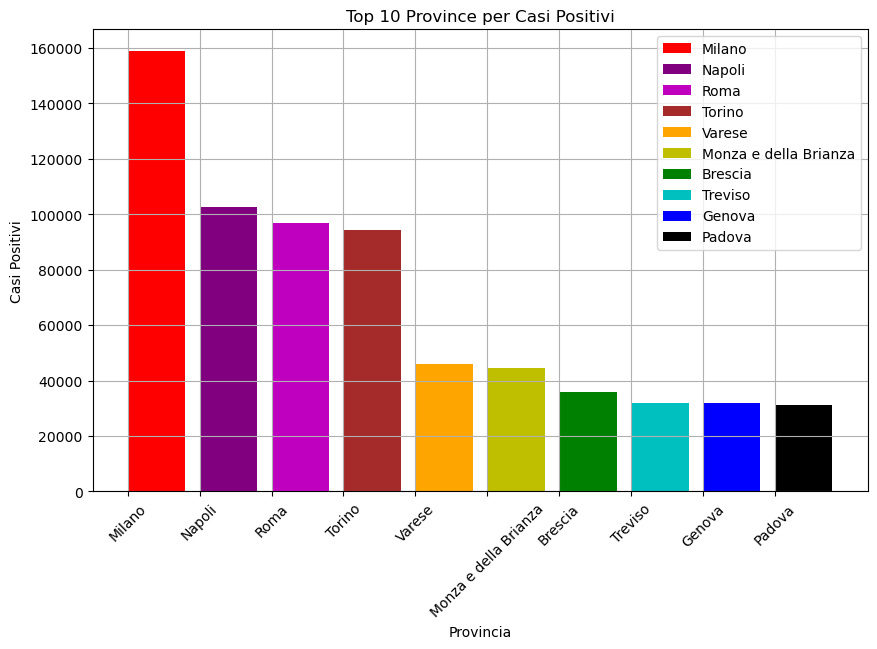

In [34]:
# calcolo delle 10 province con il maggior numero di casi positivi

Total_Positive_Cases_province = province_clean.groupby('ProvinceName')['TotalPositiveCases'].max()
sorted_province = Total_Positive_Cases_province.sort_values(ascending=False)
top_10_province = sorted_province.head(10)
print("Le dieci province con il maggior tasso di pazienti positivi sono:")
print(top_10_province)

# Produzione del grafico con colori diversi per ciascuna provincia
province = top_10_province.index
total_cases = top_10_province.values
plt.figure(figsize=(10, 6))
colors = ['r','purple','m', 'brown','orange', 'y', 'g', 'c',  'b', 'k' ]
for i in range(len(province)):
    plt.bar(province[i], total_cases[i], color=colors[i], label=province[i], align='edge')
plt.title("Top 10 Province per Casi Positivi")
plt.xlabel("Provincia")
plt.ylabel("Casi Positivi")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


poveri_regione: (20, 2)                       Territorio  Osservazione
0                       Piemonte           8.9
1                  Valle d'Aosta           6.3
2                        Liguria          10.6
3                      Lombardia           9.0
4   Trentino-Alto Adige/Sudtirol           4.8
5                         Veneto           8.0
6          Friuli-Venezia Giulia           7.8
7                 Emilia-Romagna           7.6
8                        Toscana           7.8
9                         Umbria          10.8
10                        Marche          14.6
11                         Lazio           6.4
12                       Abruzzo          15.5
13                        Molise          21.4
14                      Campania          26.3
15                        Puglia          23.2
16                    Basilicata          27.0
17                      Calabria          24.1
18                       Sicilia          22.0
19                      Sardegna    

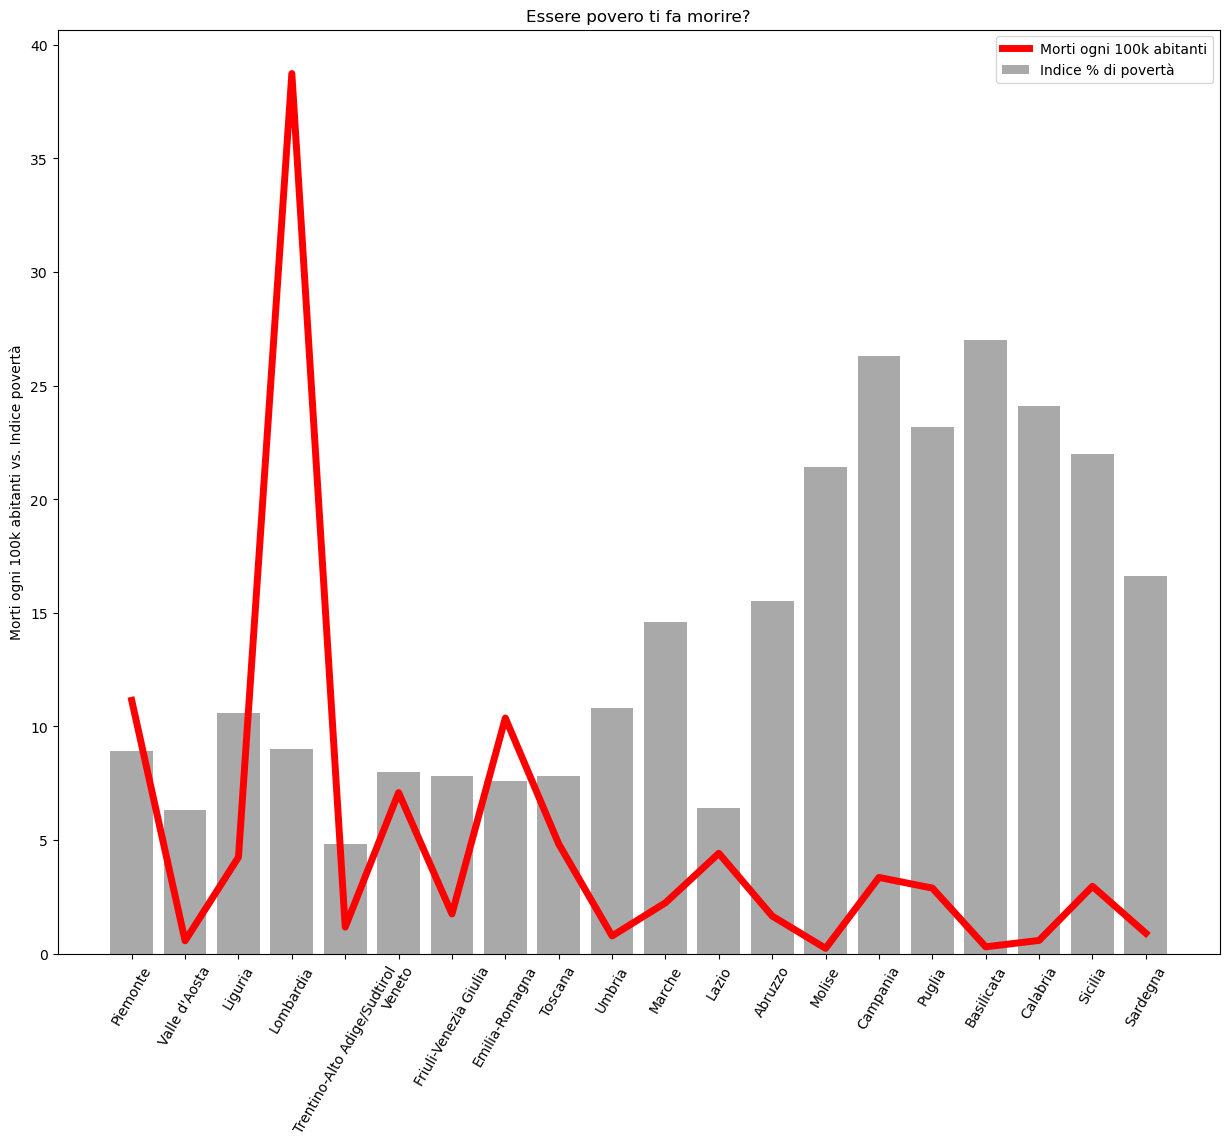

In [35]:
# Leggi il file CSV dei poveri
poveri_regione = pd.read_csv('/Users/michelavenier/Desktop/EPICODE/BUILD_WEEK_2/poveri_regione_clean.csv')
poveri_regione = poveri_regione.drop(['Unnamed: 0'], axis=1)

# Converte la colonna Popolazione2011 in numerica
comuni_clean['Popolazione2011'] = pd.to_numeric(comuni_clean['Popolazione2011'])

# Calcola la somma della popolazione per regione
abitanti_regione = comuni_clean.groupby('Regione')['Popolazione2011'].sum().reset_index()
abitanti_regione = abitanti_regione.drop(0)


# Prendi il valore massimo di decessi per regione
regioni_raggruppate = regioni_clean.groupby('RegionName')['Deaths'].max().reset_index()

# Unisci i dati dei poveri con i dati dei decessi
join_poveri_covidcase = pd.merge(poveri_regione, regioni_raggruppate, left_on='Territorio', right_on='RegionName', how='inner')

# Unisci i dati completi
complessivo_contagi = pd.merge(join_poveri_covidcase, abitanti_regione, left_on='Territorio', right_on='Regione', how='inner')

# Stampa i DataFrame
print("poveri_regione:", poveri_regione.shape, poveri_regione)
print("abitanti_regione:", abitanti_regione.shape, abitanti_regione)
print("regioni_raggruppate:", regioni_raggruppate.shape, regioni_raggruppate)
print("join_poveri_covidcase:", join_poveri_covidcase.shape, join_poveri_covidcase)
print("complessivo_contagi:", complessivo_contagi.shape, complessivo_contagi)
#problema con Valle d'Aosta

# Visualizzazione grafica
plt.figure(figsize=(15, 12))
plt.plot(complessivo_contagi['Territorio'], (complessivo_contagi['Deaths'] / complessivo_contagi['Popolazione2011'].sum()) * 100000, color='red', linewidth=5, label='Morti ogni 100k abitanti')
plt.bar(complessivo_contagi['Territorio'], complessivo_contagi['Osservazione'], color='darkgrey', label='Indice % di povertà')
plt.xticks(rotation=60)
plt.title('Essere povero ti fa morire?')
plt.ylabel('Morti ogni 100k abitanti vs. Indice povertà')
plt.legend()
plt.show()


In [36]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL del sito web
url = 'https://it.wikipedia.org/wiki/Regioni_d%27Italia#Dati_demografici_e_geografici'

# Effettua una richiesta GET al sito
response = requests.get(url)

# Verifica se la richiesta è andata a buon fine
if response.status_code == 200:
    # Utilizza BeautifulSoup per analizzare il contenuto HTML della pagina
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trova la tabella delle regioni
    table = soup.find('table', {'class': 'wikitable'})

    # Inizializza una lista per memorizzare i dati
    data = []

    # Estrai i dati dalla tabella
    rows = table.find_all('tr')
    for row in rows[1:]:  # Salta la riga delle intestazioni
        cells = row.find_all(['th', 'td'])
        regione = cells[0].text.strip()
        superficie = cells[3].text.strip()  # Assumendo che la superficie sia nella quarta colonna
        data.append([regione, superficie])

    # Crea un DataFrame pandas
    df = pd.DataFrame(data, columns=['Regione', 'Superficie_km2'])
    df = df.drop(df.index[-1])

    # Stampa il DataFrame
    print(df)
else:
    print('Errore nella richiesta HTTP')

print(ripartizioni_clean, regioni_clean['RegionName'].unique(), "df", df)


                  Regione Superficie_km2
0               Lombardia      23 863,10
1                   Lazio      17 231,72
2                Campania      13 670,60
3                  Veneto      18 345,37
4                 Sicilia      25 832,55
5          Emilia-Romagna      22 501,43
6                Piemonte      25 386,70
7                  Puglia      19 540,52
8                 Toscana      22 987,44
9                Calabria      15 221,61
10               Sardegna      24 099,45
11                Liguria       5 416,15
12                 Marche       9 344,29
13                Abruzzo      10 831,50
14  Friuli-Venezia Giulia       7 932,48
15    Trentino-Alto Adige      13 604,72
16                 Umbria       8 464,22
17             Basilicata      10 073,11
18                 Molise       4 460,44
19          Valle d'Aosta       3 260,85
    Codice Regione Ripartizione geografica                       Regione
0                1              Nord-ovest                      Pi

                  Regione Superficie_km2
0               Lombardia      23 863,10
1                   Lazio      17 231,72
2                Campania      13 670,60
3                  Veneto      18 345,37
4                 Sicilia      25 832,55
5          Emilia-Romagna      22 501,43
6                Piemonte      25 386,70
7                  Puglia      19 540,52
8                 Toscana      22 987,44
9                Calabria      15 221,61
10               Sardegna      24 099,45
11                Liguria       5 416,15
12                 Marche       9 344,29
13                Abruzzo      10 831,50
14  Friuli-Venezia Giulia       7 932,48
15    Trentino-Alto Adige      13 604,72
16                 Umbria       8 464,22
17             Basilicata      10 073,11
18                 Molise       4 460,44
19          Valle d'Aosta       3 260,85
    Codice Regione Ripartizione geografica                       Regione
0                1              Nord-ovest                      Pi

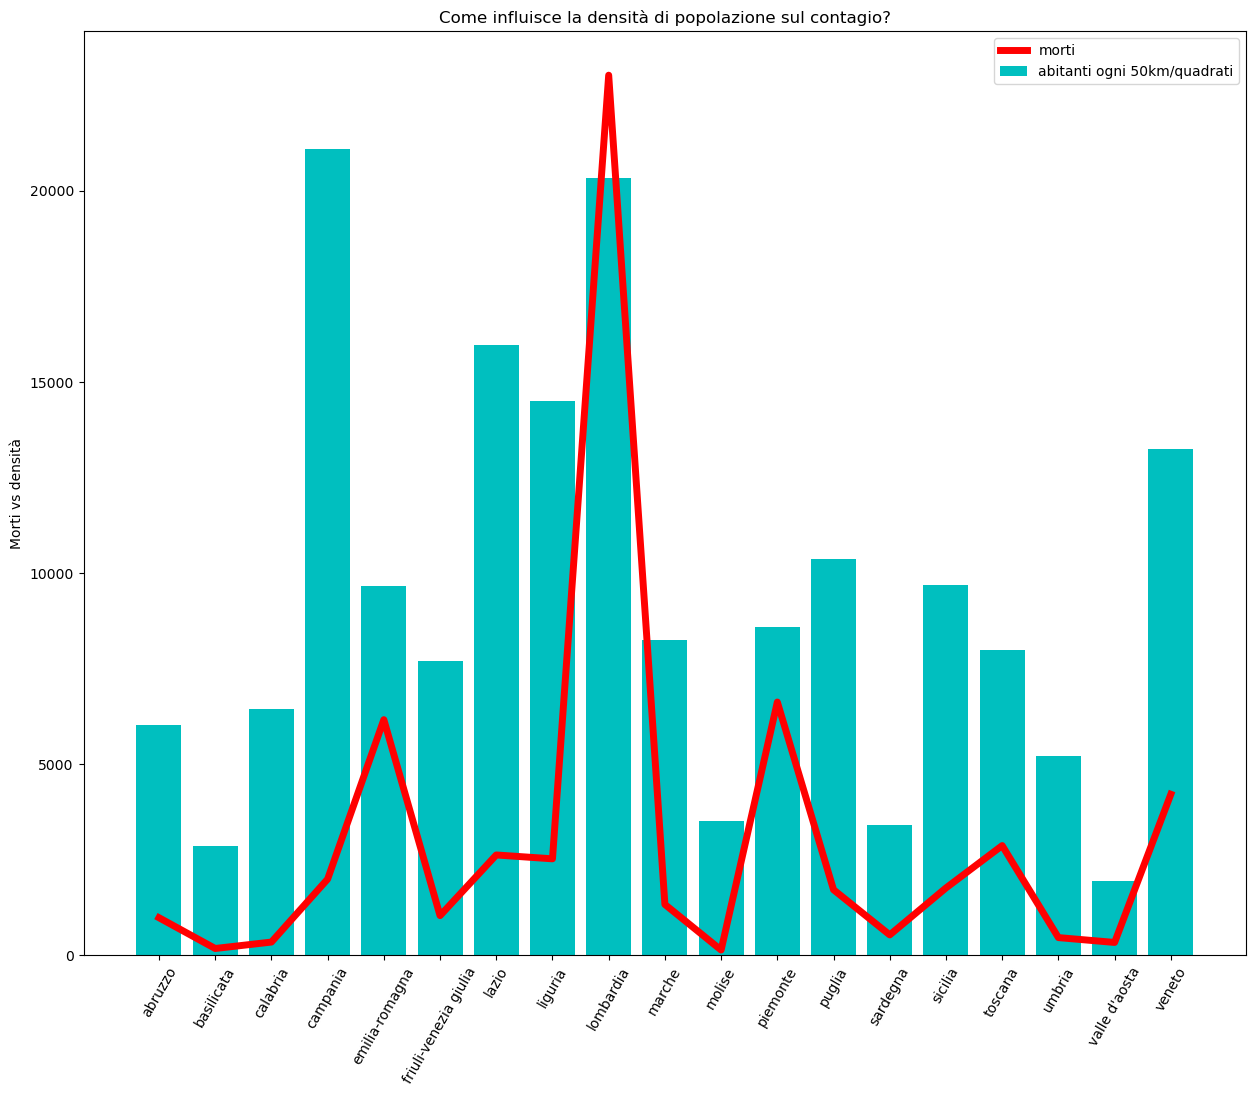

In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL del sito web
url = 'https://it.wikipedia.org/wiki/Regioni_d%27Italia#Dati_demografici_e_geografici'

# Effettua una richiesta GET al sito
response = requests.get(url)

# Verifica se la richiesta è andata a buon fine
if response.status_code == 200:
    # Utilizza BeautifulSoup per analizzare il contenuto HTML della pagina
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trova la tabella delle regioni
    table = soup.find('table', {'class': 'wikitable'})

    # Inizializza una lista per memorizzare i dati
    data = []

    # Estrai i dati dalla tabella
    rows = table.find_all('tr')
    for row in rows[1:]:  # Salta la riga delle intestazioni
        cells = row.find_all(['th', 'td'])
        regione = cells[0].text.strip()
        superficie = cells[3].text.strip()  # Assumendo che la superficie sia nella quarta colonna
        data.append([regione, superficie])

    # Crea un DataFrame pandas
    df = pd.DataFrame(data, columns=['Regione', 'Superficie_km2'])
    df = df.drop(df.index[-1])

    # Stampa il DataFrame
    print(df)
else:
    print('Errore nella richiesta HTTP')

print(ripartizioni_clean, regioni_clean['RegionName'].unique(), "df", df)
df['Superficie_km2']= df['Superficie_km2'].replace('trentino-alto adige', 'trentino-alto adige/sudtirol')


abitanti_regione=comuni_clean.groupby('Regione')['Popolazione2011'].sum().reset_index()
abitanti_regione['Regione']=abitanti_regione['Regione'].str.lower()
abitanti_regione['Regione'] = abitanti_regione['Regione'].replace('trentino-alto adige','trentino-alto adige/sudtirol')

df['Regione']=df['Regione'].str.lower()
df['Superficie_km2'] = df['Superficie_km2'].str.replace(',', '.').str.replace(r'\s+', '', regex=True).astype(float)
df['Superficie_km2']= df['Superficie_km2'].replace('trentino-alto adige', 'trentino-alto adige/sudtirol')

calcolo_densita=pd.merge(abitanti_regione, df, left_on='Regione', right_on='Regione')
calcolo_densita['Superficie_km2']=calcolo_densita['Superficie_km2'].astype(float)
calcolo_densita['densita']=calcolo_densita['Popolazione2011']/calcolo_densita['Superficie_km2']
regioni_raggruppate['RegionName']=regioni_raggruppate['RegionName'].str.lower()

morti_densita=pd.merge(calcolo_densita, regioni_raggruppate, left_on='Regione', right_on='RegionName')
print("morti_densita", morti_densita)


plt.figure(figsize=(15,12))
plt.bar(morti_densita['Regione'],morti_densita['densita']*50, color='c', label='abitanti ogni 50km/quadrati')
plt.plot(morti_densita['Regione'],morti_densita['Deaths'], color='r',linewidth=5, label='morti')
plt.xticks(rotation=60)
plt.title('Come influisce la densità di popolazione sul contagio?')
plt.ylabel('Morti vs densità')
plt.legend()
plt.show()


                              count          mean          std  min      25%  \
RegionName                                                                     
Abruzzo                       287.0    412.188153   205.593205  0.0    338.0   
Basilicata                    287.0     33.801394    31.523090  0.0     25.0   
Calabria                      287.0     97.013937    58.899165  0.0     88.5   
Campania                      287.0    470.588850   351.108681  0.0    372.5   
Emilia-Romagna                287.0   3758.376307  1454.794924  0.0   3721.0   
Friuli-Venezia Giulia         287.0    325.515679   173.187635  0.0    304.5   
Lazio                         287.0    811.693380   532.126717  0.0    536.0   
Liguria                       287.0   1357.435540   596.388034  0.0   1237.5   
Lombardia                     287.0  14552.163763  5457.487022  6.0  14500.0   
Marche                        287.0    868.832753   318.123794  0.0    939.5   
Molise                        287.0     

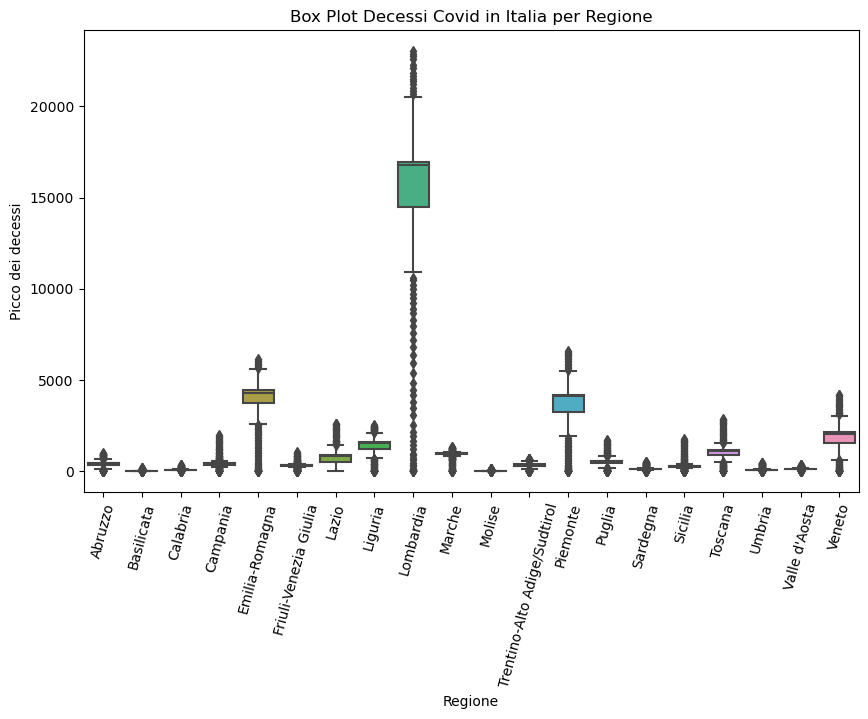

In [38]:
# box plot che indica la distribuzione dei Decessi per Covid-19 in Italia per regione

import matplotlib.pyplot as plt
import seaborn as sns

# i dati della regione Lombardia, molto più grandi rispetto a quelli delle altre regioni, vanno a determinare uno schiacciamento dei box plot delle altre regioni
# Se si vogliono visualizzare i box plot delle altre regioni in maggiore dettaglio, si può rimuovere la riga corrispondente alla regione Lombardia in questo modo:
#regioni_decessi = regioni_clean[regioni_clean['RegionName'] != 'Lombardia']
#regioni_decessi = regioni_clean['RegionName']

regioni_somma_decessi = regioni_clean.groupby('RegionName')['Deaths']
print(regioni_somma_decessi.describe())
                            
# Plot del boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=regioni_clean, x='RegionName', y='Deaths')
plt.xlabel('Regione')
plt.ylabel('Picco dei decessi')
plt.title('Box Plot Decessi Covid in Italia per Regione')
plt.xticks(rotation=75)  # Rotazione delle etichette sull'asse x per una migliore leggibilità
plt.show()


In [39]:
# aggiungo la colonna ripartizioni geografiche alle regioni facendo un join tra i dataset regioni_clean e ripartizioni_clean; 
# questo si potrebbe utilizzare per analisi ulteriori sull'analisi dell'epidemia per ripartizione geografica

import pandas as pd

result = pd.merge(regioni_clean, ripartizioni_clean, left_on='RegionCode', right_on='Codice Regione', how='inner')
print(result.head(2))


   SNo Country  RegionCode RegionName   Latitude  Longitude  \
0    0     ITA          13    Abruzzo  42.351222  13.398438   
1   21     ITA          13    Abruzzo  42.351222  13.398438   

   HospitalizedPatients  IntensiveCarePatients  TotalHospitalizedPatients  \
0                     0                      0                          0   
1                     0                      0                          0   

   HomeConfinement  CurrentPositiveCases  NewPositiveCases  Recovered  Deaths  \
0                0                     0                 0          0       0   
1                0                     0                 0          0       0   

   TotalPositiveCases  TestsPerformed  Codice Regione Ripartizione geografica  \
0                   0             NaN              13                     Sud   
1                   0             NaN              13                     Sud   

   Regione  
0  Abruzzo  
1  Abruzzo  
